In [398]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')

df


date  likes  comments  \
0     2022-01-02      1        70   
1     2022-01-03     13        10   
2     2022-01-03     11       210   
3     2022-01-03     10       210   
4     2022-01-03     14       380   
...          ...    ...       ...   
7978  2022-07-21      1        40   
7979  2022-07-21      0        40   
7980  2022-07-21      1        40   
7981  2022-07-21      0        50   
7982  2022-07-21     38        80   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7978  https://mbasic.facebook.com/groups/32275791783...   
7979  https://mbasic.facebook.com/groups/32275791783...   
7980  https://mbasic.facebook.com/groups/32275791783...   
7981  https://mbasic.facebook.com/groups/32275791783...   
7982  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     Привет! Вопрос о пересечении границы Беларусь-...   
1                   Также делаю квесты для детей для...   
2     Здравствуйте! Планирую открыть счёт в банке PK...   
3     Всем привет. Может у кого-то из вас была такая...   
4     Кто-нибудь в курсе, что за изменения в отношен...   
...                                                 ...   
7978  Подскажите пожалуйста,из Тересполя в Брест,кро...   
7979  Добрый день, кто-нибудь знает, можно ли привит...   
7980  Добрага дня, шаноўныя ! Можа тут нехта працуе ...   
7981  Всем привет Подскажите, где оформить доверенно...   
7982                                        Отдам даром   

                                          preproccessed  \
0     Привет Вопрос о пересечении границы Беларусь П...   
1                     Также делаю квесты для детей для    
2     Здравствуйте Планирую открыть счёт в банке PKO...   
3     Всем привет Может у кого то из вас была такая ...   
4     Кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  Подскажите пожалуйста из Тересполя в Брест кро...   
7979  Добрый день кто нибудь знает можно ли привить ...   
7980  Добрага дня шаноўныя Можа тут нехта працуе ў т...   
7981  Всем привет Подскажите где оформить довереннос...   
7982                                        Отдам даром   

                                              text_prep  \
0     привет вопрос о пересечении границы беларусь п...   
1                     также делаю квесты для детей для    
2     здравствуйте планирую открыть счёт в банке pko...   
3     всем привет может у кого то из вас была такая ...   
4     кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  подскажите пожалуйста из тересполя в брест кро...   
7979  добрый день кто нибудь знает можно ли привить ...   
7980  добрага дня шаноўныя можа тут нехта працуе ў т...   
7981  всем привет подскажите где оформить довереннос...   
7982                                        отдам даром   

                                                text_sw  \
0                   пересечении границы беларусь польша   
1                                          квесты детей   
2     планирую открыть счёт банке pko начисления зп ...   
3     ситуация рб числюсь тунеядец предоставить подт...   
4                   курсе отношении выдачи карты поляка   
...                                                 ...   
7978  подскажите тересполя брест автобуса ездят каки...   
7979  привить covid желательно pfizer ’ ом родителей...   
7980  добрага дня шаноўныя нехта працуе турыстычных ...   
7981  подскажите оформить доверенность машину поеду ...   
7982                                              отдам   

                      

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7983 non-null   object
 1   likes          7983 non-null   int64 
 2   comments       7983 non-null   int64 
 3   link to post   7983 non-null   object
 4   postfs         7983 non-null   object
 5   preproccessed  7983 non-null   object
 6   text_prep      7983 non-null   object
 7   text_sw        7983 non-null   object
 8   text_lemm      7983 non-null   object
dtypes: int64(2), object(7)
memory usage: 561.4+ KB


In [226]:
#checking empty strings
#replace empty string with nan
df['text_lemm'] = df['text_lemm'].replace(r'^\s*$', np.NaN, regex=True)

In [227]:
df.dropna(subset = ['text_lemm'], inplace=True)

In [228]:
df.reset_index(drop=True, inplace=True)

In [229]:
df

date  likes  comments  \
0     2022-01-02      1        70   
1     2022-01-03     13        10   
2     2022-01-03     11       210   
3     2022-01-03     10       210   
4     2022-01-03     14       380   
...          ...    ...       ...   
7978  2022-07-21      1        40   
7979  2022-07-21      0        40   
7980  2022-07-21      1        40   
7981  2022-07-21      0        50   
7982  2022-07-21     38        80   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7978  https://mbasic.facebook.com/groups/32275791783...   
7979  https://mbasic.facebook.com/groups/32275791783...   
7980  https://mbasic.facebook.com/groups/32275791783...   
7981  https://mbasic.facebook.com/groups/32275791783...   
7982  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     Привет! Вопрос о пересечении границы Беларусь-...   
1                   Также делаю квесты для детей для...   
2     Здравствуйте! Планирую открыть счёт в банке PK...   
3     Всем привет. Может у кого-то из вас была такая...   
4     Кто-нибудь в курсе, что за изменения в отношен...   
...                                                 ...   
7978  Подскажите пожалуйста,из Тересполя в Брест,кро...   
7979  Добрый день, кто-нибудь знает, можно ли привит...   
7980  Добрага дня, шаноўныя ! Можа тут нехта працуе ...   
7981  Всем привет Подскажите, где оформить доверенно...   
7982                                        Отдам даром   

                                          preproccessed  \
0     Привет Вопрос о пересечении границы Беларусь П...   
1                     Также делаю квесты для детей для    
2     Здравствуйте Планирую открыть счёт в банке PKO...   
3     Всем привет Может у кого то из вас была такая ...   
4     Кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  Подскажите пожалуйста из Тересполя в Брест кро...   
7979  Добрый день кто нибудь знает можно ли привить ...   
7980  Добрага дня шаноўныя Можа тут нехта працуе ў т...   
7981  Всем привет Подскажите где оформить довереннос...   
7982                                        Отдам даром   

                                              text_prep  \
0     привет вопрос о пересечении границы беларусь п...   
1                     также делаю квесты для детей для    
2     здравствуйте планирую открыть счёт в банке pko...   
3     всем привет может у кого то из вас была такая ...   
4     кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  подскажите пожалуйста из тересполя в брест кро...   
7979  добрый день кто нибудь знает можно ли привить ...   
7980  добрага дня шаноўныя можа тут нехта працуе ў т...   
7981  всем привет подскажите где оформить довереннос...   
7982                                        отдам даром   

                                                text_sw  \
0                   пересечении границы беларусь польша   
1                                          квесты детей   
2     планирую открыть счёт банке pko начисления зп ...   
3     ситуация рб числюсь тунеядец предоставить подт...   
4                   курсе отношении выдачи карты поляка   
...                                                 ...   
7978  подскажите тересполя брест автобуса ездят каки...   
7979  привить covid желательно pfizer ’ ом родителей...   
7980  добрага дня шаноўныя нехта працуе турыстычных ...   
7981  подскажите оформить доверенность машину поеду ...   
7982                                              отдам   

                      

In [230]:
# convert datetime type
df['date'] = pd.to_datetime(df['date'])

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7983 non-null   datetime64[ns]
 1   likes          7983 non-null   int64         
 2   comments       7983 non-null   int64         
 3   link to post   7983 non-null   object        
 4   postfs         7983 non-null   object        
 5   preproccessed  7983 non-null   object        
 6   text_prep      7983 non-null   object        
 7   text_sw        7983 non-null   object        
 8   text_lemm      7983 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 561.4+ KB


In [232]:
import itertools
import matplotlib.cm as cm

In [233]:
df = df.set_index(['date'])
df.head(8)

likes  comments  \
date                          
2022-01-02      1        70   
2022-01-03     13        10   
2022-01-03     11       210   
2022-01-03     10       210   
2022-01-03     14       380   
2022-01-03      1        40   
2022-01-03      7        70   
2022-01-03     11       220   

                                                 link to post  \
date                                                            
2022-01-02  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   

                                                       postfs  \
date                                                            
2022-01-02  Привет! Вопрос о пересечении границы Беларусь-...   
2022-01-03                Также делаю квесты для детей для...   
2022-01-03  Здравствуйте! Планирую открыть счёт в банке PK...   
2022-01-03  Всем привет. Может у кого-то из вас была такая...   
2022-01-03  Кто-нибудь в курсе, что за изменения в отношен...   
2022-01-03                                    , остеопатии...   
2022-01-03  Кто может выполнить комплекс строительных рабо...   
2022-01-03  енно). Вообще, человек из жкх сказал, что обыч...   

                                                preproccessed  \
date                                                            
2022-01-02  Привет Вопрос о пересечении границы Беларусь П...   
2022-01-03                  Также делаю квесты для детей для    
2022-01-03  Здравствуйте Планирую открыть счёт в банке PKO...   
2022-01-03  Всем привет Может у кого то из вас была такая ...   
2022-01-03  Кто нибудь в курсе что за изменения в отношени...   
2022-01-03                                        остеопатии    
2022-01-03  Кто может выполнить комплекс строительных рабо...   
2022-01-03  енно Вообще человек из жкх сказал что обычно е...   

                                                    text_prep  \
date                                                            
2022-01-02  привет вопрос о пересечении границы беларусь п...   
2022-01-03                  также делаю квесты для детей для    
2022-01-03  здравствуйте планирую открыть счёт в банке pko...   
2022-01-03  всем привет может у кого то из вас была такая ...   
2022-01-03  кто нибудь в курсе что за изменения в отношени...   
2022-01-03                                        остеопатии    
2022-01-03  кто может выполнить комплекс строительных рабо...   
2022-01-03  енно вообще человек из жкх сказал что обычно е...   

                                                      text_sw  \
date                                                            
2022-01-02                пересечении границы беларусь польша   
2022-01-03                                       квесты детей   
2022-01-03  планирую открыть счёт банке pko начисления зп ...   
2022-01-03  ситуация рб числюсь тунеядец предоставить подт...   
2022-01-03                курсе отношении выдачи карты поляка   
2022-01-03                                         остеопатии   
2022-01-03  выполнить комплекс строительных работ нового п...   
2022-01-03  енно жкх присылают какие справки польской нало...   

                                                    text_lemm  
date                                                           
2022-01-02               пересечение граница беларусь польша   
2022-01-03                                            квеста   
2022-01-03  планировать открывать счет банк pko начисление...  
2022-01-03  ситуация рб числиться тунеядец предоставлять п...  
2022-01-03                      отношение выдача карта поляк  

In [234]:
def f(x):
     return Series(dict(Number_of_posts = x['postfs'].count(), 
                        ))

In [235]:
daily_count = df.groupby(df.index.date).apply(f)
#print len(daily_count)
daily_count.head(20)

Number_of_posts
2022-01-02                1
2022-01-03                7
2022-01-04                9
2022-01-05               20
2022-01-06               15
2022-01-07               13
2022-01-08               22
2022-01-09               29
2022-01-10               75
2022-01-11               51
2022-01-12               50
2022-01-13               46
2022-01-14               62
2022-01-15               48
2022-01-16               46
2022-01-17               81
2022-01-18               66
2022-01-19               31
2022-01-20               55
2022-01-21                1

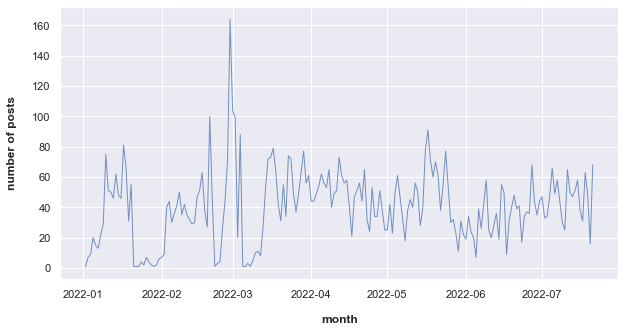

In [236]:
daily_plot = daily_count['Number_of_posts'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True, figsize = (10, 5))

daily_plot.set_xlabel('month', weight='bold', labelpad=15)   
daily_plot.set_ylabel('number of posts', weight='bold', labelpad=15) 

daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) 


In [237]:
#daily_count.to_csv('Number of Posts per Day.csv')

In [238]:
weekday_count = df.groupby(df.index.weekday).apply(f)
#print len(weekday_count)
weekday_count

Number_of_posts
date                 
0                1378
1                1291
2                1142
3                1302
4                1143
5                 828
6                 899

In [239]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count

Number_of_posts        day
date                            
0                1378     Monday
1                1291    Tuesday
2                1142  Wednesday
3                1302   Thursday
4                1143     Friday
5                 828   Saturday
6                 899     Sunday

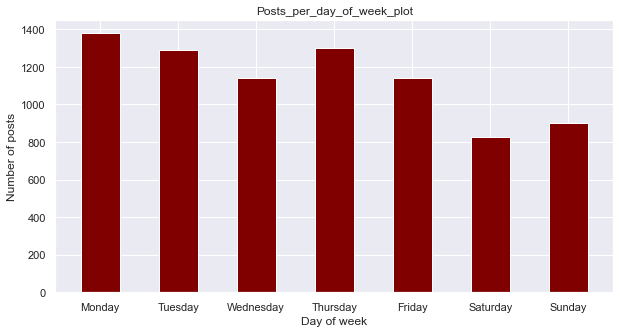

In [240]:
#day_of_week_plot = weekday_count['Number_of_posts'].plot(kind='bar')
fig = plt.figure(figsize = (10, 5))

plt.bar( days,weekday_count['Number_of_posts'], color ='maroon',
        width = 0.5)
plt.xlabel("Day of week")
plt.ylabel("Number of posts")
plt.title("Posts_per_day_of_week_plot")
plt.show()


In [241]:
print(df['likes'])

date
2022-01-02     1
2022-01-03    13
2022-01-03    11
2022-01-03    10
2022-01-03    14
              ..
2022-07-21     1
2022-07-21     0
2022-07-21     1
2022-07-21     0
2022-07-21    38
Name: likes, Length: 7983, dtype: int64


In [242]:
# Get the data
post_count = len(df)
likes_count = df['likes'].sum()
comments_count = df['comments'].sum()

In [243]:
# Print it out
print('Number of posts: ' + str(post_count))
print('Total number of likes: ' + str(likes_count))
print('Total number of comments: ' + str(comments_count))

Number of posts: 7983
Total number of likes: 68543
Total number of comments: 271300


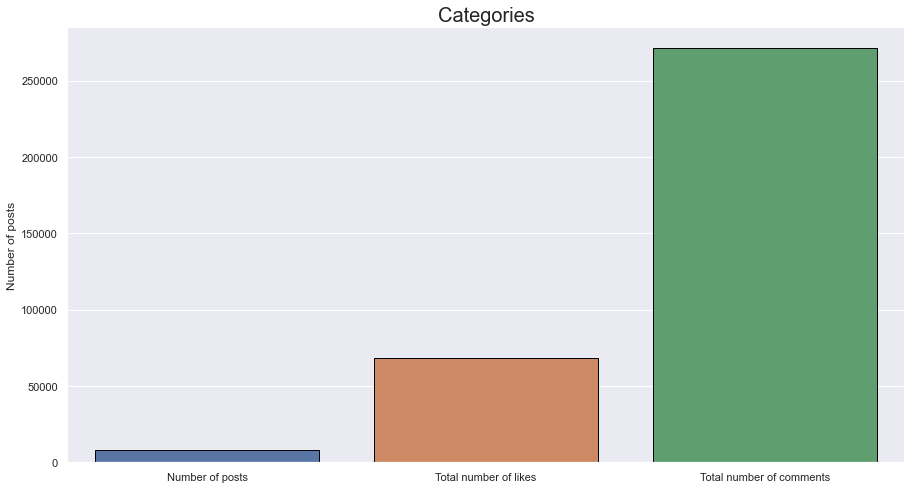

In [244]:
import seaborn as sns
#Now we will plot all the different categories.
len_list = [ post_count, likes_count,comments_count]
item_list = ['Number of posts','Total number of likes', 'Total number of comments']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Categories', fontsize = 20)
#plt.xlabel('Type of data')
plt.ylabel('Number of posts')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [245]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7983 non-null   object
 1   likes          7983 non-null   int64 
 2   comments       7983 non-null   int64 
 3   link to post   7983 non-null   object
 4   postfs         7983 non-null   object
 5   preproccessed  7983 non-null   object
 6   text_prep      7983 non-null   object
 7   text_sw        7983 non-null   object
 8   text_lemm      7983 non-null   object
dtypes: int64(2), object(7)
memory usage: 561.4+ KB


Text(0, 0.5, 'posts')

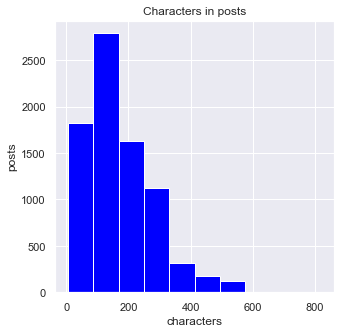

In [246]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig, ax1 = plt.subplots( figsize=(5,5))
post_len = df['postfs'].str.len()
ax1.hist(post_len, color='blue')
ax1.set_title('Characters in posts')
ax1.set_xlabel('characters')
ax1.set_ylabel('posts')

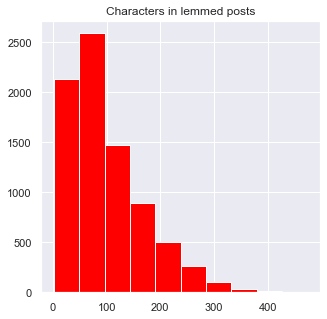

Text(3.200000000000003, 0.5, 'posts')

In [247]:
fig, ax2 = plt.subplots( figsize=(5,5))
lemm_len = df['text_lemm'].str.len()
ax2.hist(lemm_len, color='red')
ax2.set_title('Characters in lemmed posts')
#fig.suptitle('Length of characters before prep data and post prep data')
plt.show()

# Add axis labels
ax2.set_xlabel('characters')
ax2.set_ylabel('posts')


# the length of objects became shorter in the second plot
#what is x and what is y

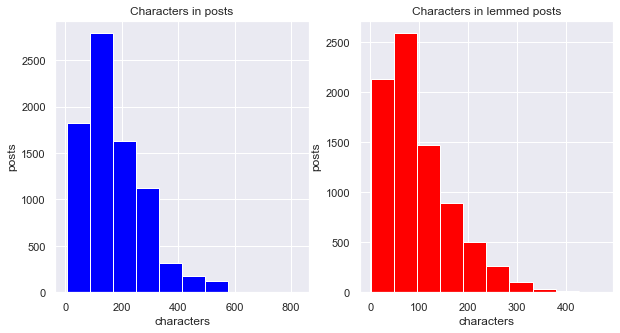

In [248]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


post_len = df['postfs'].str.len()
ax1.hist(post_len, color='blue')
ax1.set_title('Characters in posts')
ax1.set_xlabel('characters')
ax1.set_ylabel('posts')

lemm_len = df['text_lemm'].str.len()
ax2.hist(lemm_len, color='red')

# Add axis labels
ax2.set_xlabel('characters')
ax2.set_ylabel('posts')
ax2.set_title('Characters in lemmed posts')
#fig.suptitle('Length of characters before prep data and post prep data')
plt.show()




In [249]:
# Get the posts lengths
df["length_posts"] =df["postfs"].str.len()
# Get the number of words in posts
df["length_lemm"] = df["text_lemm"].str.len()
# Get the number of words in posts
df["words_post"] = df["postfs"].str.split().str.len()
# Display the new columns
display(df[["length_posts", "length_lemm","words_post"]])

length_posts  length_lemm  words_post
0               52           36           6
1               35            7           6
2              149           88          22
3              135           58          22
4               69           29          11
...            ...          ...         ...
7978           182           74          26
7979           137           59          21
7980           242          195          36
7981           127           59          21
7982            11            9           2

[7983 rows x 3 columns]

In [250]:
# Print the summary statistics
print(df.describe())

             likes     comments  length_posts  length_lemm   words_post
count  7983.000000  7983.000000   7983.000000  7983.000000  7983.000000
mean      8.586121    33.984718    171.466867    99.270324    25.444570
std      33.134783    78.231475    107.707097    68.962331    16.654406
min       0.000000     0.000000      5.000000     2.000000     1.000000
25%       0.000000     0.000000     91.000000    47.000000    13.000000
50%       1.000000    10.000000    146.000000    81.000000    22.000000
75%       4.000000    40.000000    235.000000   136.000000    35.000000
max     854.000000  2020.000000    822.000000   474.000000   120.000000


In [251]:
#likes comments scatter plot
text=(df['text_lemm'])

<AxesSubplot:xlabel='likes', ylabel='comments'>

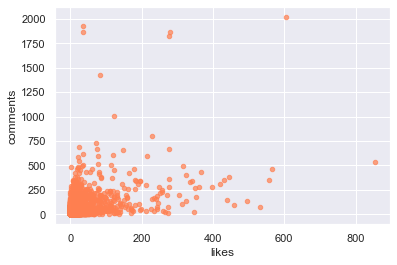

In [252]:
df.plot.scatter(x="likes", y="comments", alpha=0.7, c='coral')

In [253]:
# Convert the date column to datetime values
df['date'] = pd.to_datetime(df['date'])

# Make date the index of the DataFrame
df = df.set_index('date')
#ax2.set_xlabel('characters')
#ax2.set_ylabel('posts')

In [254]:
df.head(2)

likes  comments  \
date                          
2022-01-02      1        70   
2022-01-03     13        10   

                                                 link to post  \
date                                                            
2022-01-02  https://mbasic.facebook.com/groups/32275791783...   
2022-01-03  https://mbasic.facebook.com/groups/32275791783...   

                                                       postfs  \
date                                                            
2022-01-02  Привет! Вопрос о пересечении границы Беларусь-...   
2022-01-03                Также делаю квесты для детей для...   

                                                preproccessed  \
date                                                            
2022-01-02  Привет Вопрос о пересечении границы Беларусь П...   
2022-01-03                  Также делаю квесты для детей для    

                                                    text_prep  \
date                                                            
2022-01-02  привет вопрос о пересечении границы беларусь п...   
2022-01-03                  также делаю квесты для детей для    

                                        text_sw  \
date                                              
2022-01-02  пересечении границы беларусь польша   
2022-01-03                         квесты детей   

                                       text_lemm  length_posts  length_lemm  \
date                                                                          
2022-01-02  пересечение граница беларусь польша             52           36   
2022-01-03                               квеста             35            7   

            words_post  
date                    
2022-01-02           6  
2022-01-03           6

Text(0, 0.5, 'mean number of likes')

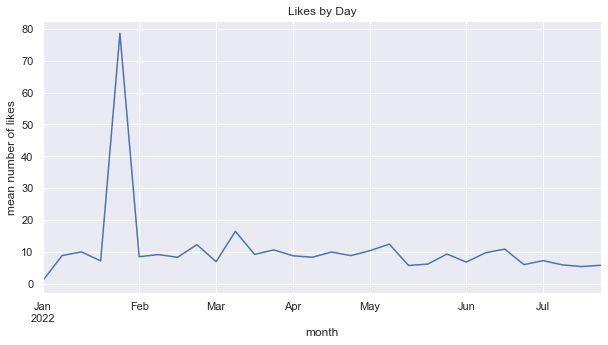

In [255]:
df.resample('W')['likes'].mean().plot(
    title="Likes by Day", figsize = (10, 5));

plt.xlabel('month')
plt.ylabel('mean number of likes')

Text(0, 0.5, 'mean number of comments')

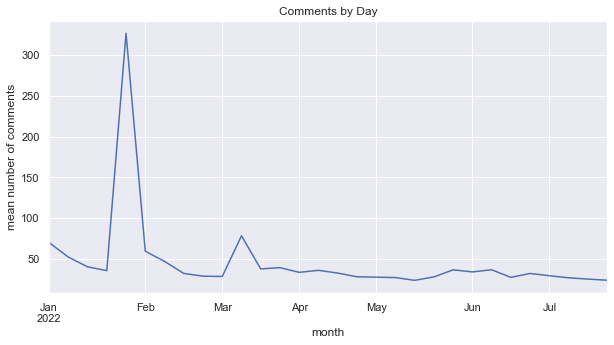

In [256]:
df.resample('W')['comments'].mean().plot(
    title="Comments by Day",figsize = (10, 5));
plt.xlabel('month')
plt.ylabel('mean number of comments')

In [257]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7983 non-null   object
 1   likes          7983 non-null   int64 
 2   comments       7983 non-null   int64 
 3   link to post   7983 non-null   object
 4   postfs         7983 non-null   object
 5   preproccessed  7983 non-null   object
 6   text_prep      7983 non-null   object
 7   text_sw        7983 non-null   object
 8   text_lemm      7983 non-null   object
dtypes: int64(2), object(7)
memory usage: 561.4+ KB


In [327]:
#Generate Wordcloud
lemm_texts_list = df['text_lemm']

In [328]:
clean = ' '.join(str (e)for e in lemm_texts_list)
from nltk import word_tokenize
text_tokens = word_tokenize(clean)

In [329]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 96218


['пересечение',
 'граница',
 'беларусь',
 'польша',
 'квеста',
 'планировать',
 'открывать',
 'счет',
 'банк',
 'pko']

In [330]:
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
fdist

FreqDist({'варшава': 1885, 'польша': 1046, 'виза': 776, 'беларусь': 747, 'польский': 742, 'карта': 598, 'рб': 533, 'ехать': 487, 'помогать': 460, 'минск': 397, ...})

In [331]:
fdist.most_common(30)

[('варшава', 1885),
 ('польша', 1046),
 ('виза', 776),
 ('беларусь', 747),
 ('польский', 742),
 ('карта', 598),
 ('рб', 533),
 ('ехать', 487),
 ('помогать', 460),
 ('минск', 397),
 ('опыт', 365),
 ('беларус', 362),
 ('граница', 357),
 ('побыт', 331),
 ('квартира', 321),
 ('группа', 299),
 ('информация', 297),
 ('язык', 285),
 ('месяц', 285),
 ('паспорт', 271),
 ('посоветовать', 267),
 ('приглашать', 249),
 ('украина', 242),
 ('приглашение', 213),
 ('поляк', 207),
 ('контакт', 205),
 ('поделиться', 201),
 ('находиться', 199),
 ('район', 198),
 ('выезжать', 195)]

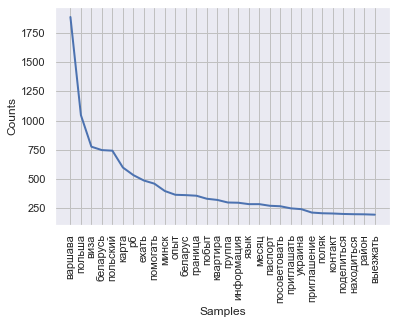

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [332]:
fdist.plot(30,cumulative=False)

In [333]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
text_raw = " ".join(text_tokens)

In [335]:
wordcloud = WordCloud(width=280, height=200, max_font_size=40, min_font_size=10).generate(text_raw)

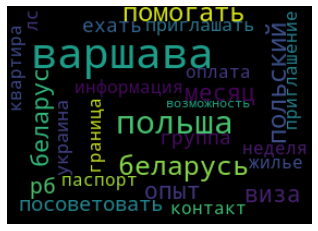

In [336]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [337]:
text_raw

'пересечение граница беларусь польша квеста планировать открывать счет банк pko начисление зп отделение pko варшава русскоговорящий ситуация рб числиться тунеядец предоставлять подтверждать отношение выдача карта поляк остеопатия выполнять комплекс строительный помещение пекарня бетонный малярный штукат енное жкх присылать справка польский налоговый подтверждать уплата налог территория рп справка ситуация рб числиться тунеядец предоставлять подтверждать ето русскоговорящег раздумье полициальный выбирать start центр варшава приглашать желающий бесплатный обучение учиться муж магчым шукать менавіта цяб посоветовать тв пакет желательно учиться стационар прив варшава удалять родинка студент пересечение граница экспресс пцр тест ответ польский требоваться декларант помощник декларант клиент прием обработка дежурство сменно офис число желательно опыт русскоязычный варшава район минск мазовецк бригада смочь косметический квартира квартира поэтапный необходимый прихожая стена потолок покраска 

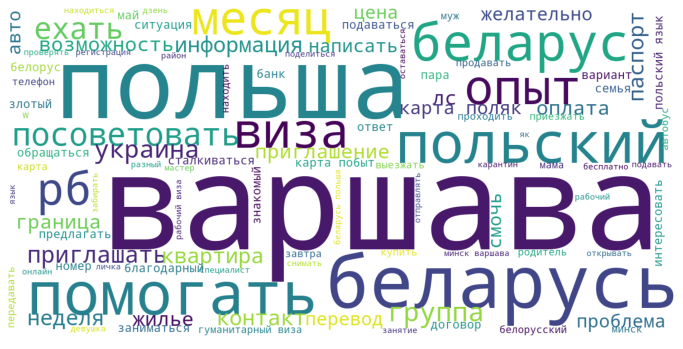

In [338]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=100,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw)

In [339]:
import spacy

In [340]:
#extract surround words

lemm_str = ' '.join([str(elem) for elem in lemm_texts_list])

In [341]:
print(type(lemm_str ))

<class 'str'>


In [342]:
import re

def extract_surround_words(text, keyword, n):
    
    #extracting all the words from text
    words = words = re.findall(r'\w+', text)
    
    #iterate through all the words
    for index, word in enumerate(words):

        #check if search keyword matches
        if word == keyword:
            #fetch left side words
            left_side_words = words[index-n : index]
            
            #fetch right side words
            right_side_words = words[index+1 : index + n + 1]
            
            print(left_side_words, right_side_words)

In [343]:
text = lemm_str
keyword = "украина"
n = 3
extract_surround_words(text, keyword, n)

['гуманитарный', 'виза', 'летать'] ['firma', 'sprzątająca', 'zatrudni']
['таблетка', 'новинет', 'привозить'] ['срок', 'годность', 'наличие']
['рабочий', 'польский', 'виза'] ['консульство', 'записываться', 'записываться']
['записываться', 'записываться', 'невозможно'] ['сталкиваться', 'проблема', 'летать']
['польский', 'уровень', 'вести'] ['й', 'преподаватель', 'польский']
['головной', 'боль', 'проблема'] ['отнюдь', 'соседний', 'путин']
['настоящий', 'головной', 'проблема'] ['повальный', 'коррупция', 'орган']
['белорус', 'польша', 'расписываться'] ['желател', 'продавать', 'принтер']
['центр', 'беларусский', 'солидарность'] ['организовывать', 'встреча', 'формат']
['типичный', 'ситуация', 'поехать'] ['разбивать', 'польский', 'номер']
['ситуация', 'снимать', 'учет'] ['польша', 'карта', 'сталый']
['приоритет', 'виза', 'виза'] ['лев', 'киев', 'потребовать']
['коридор', 'выжидать', 'подача'] ['коридор', 'поздравлять', 'близкие']
['рассматривать', 'подработка', 'няня'] ['вводить', 'специальный

In [344]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [345]:
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]

In [346]:
def plot_top_non_stopwords_barchart(text):
    stop=russian_stopwords
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(15,8))        
    sns.barplot(x=y,y=x)

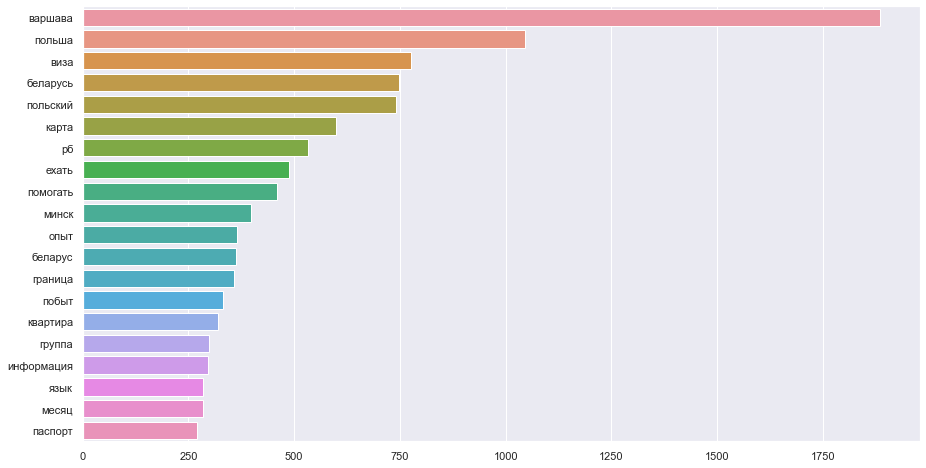

In [347]:
plot_top_non_stopwords_barchart(df['text_lemm'])

In [348]:
#most_comment dataframe
df_mostcomment = df.loc[df.comments.nlargest(40).index]

In [349]:
df_mostcomment

date  likes  comments  \
2850  2022-03-23    606      2020   
1090  2022-02-10     34      1930   
740   2022-01-26    280      1860   
1070  2022-02-10     34      1860   
739   2022-01-26    277      1820   
6775  2022-06-25     82      1420   
872   2022-02-05    122      1010   
2691  2022-03-20    229       800   
5784  2022-05-23     73       730   
2655  2022-03-19     23       690   
730   2022-01-24    276       670   
772   2022-02-02     75       670   
6750  2022-06-24    148       660   
2572  2022-03-18     36       620   
850   2022-02-04    120       610   
738   2022-01-26     78       600   
6304  2022-06-12    216       600   
7846  2022-07-18     20       590   
61    2022-01-07     25       550   
3242  2022-03-31    854       540   
918   2022-02-06     78       520   
1756  2022-02-28     36       510   
2970  2022-03-25    115       510   
485   2022-01-16     32       490   
3554  2022-04-06    317       490   
14    2022-01-04      1       480   
3613  2022-04-07     20       480   
3680  2022-04-08     20       470   
734   2022-01-25    567       460   
2211  2022-03-05     19       460   
5713  2022-05-22     61       460   
7786  2022-07-17    179       460   
1633  2022-02-26     28       450   
5758  2022-05-23    121       450   
1154  2022-02-12    365       430   
1892  2022-02-28     54       430   
3282  2022-04-01     43       430   
3285  2022-04-01     79       430   
393   2022-01-14     24       420   
2255  2022-03-13     13       420   

                                           link to post  \
2850  https://mbasic.facebook.com/groups/32275791783...   
1090  https://mbasic.facebook.com/groups/32275791783...   
740   https://mbasic.facebook.com/groups/32275791783...   
1070  https://mbasic.facebook.com/groups/32275791783...   
739   https://mbasic.facebook.com/groups/32275791783...   
6775  https://mbasic.facebook.com/groups/32275791783...   
872   https://mbasic.facebook.com/groups/32275791783...   
2691  https://mbasic.facebook.com/groups/32275791783...   
5784  https://mbasic.facebook.com/groups/32275791783...   
2655  https://mbasic.facebook.com/groups/32275791783...   
730   https://mbasic.facebook.com/groups/32275791783...   
772   https://mbasic.facebook.com/groups/32275791783...   
6750  https://mbasic.facebook.com/groups/32275791783...   
2572  https://mbasic.facebook.com/groups/32275791783...   
850   https://mbasic.facebook.com/groups/32275791783...   
738   https://mbasic.facebook.com/groups/32275791783...   
6304  https://mbasic.facebook.com/groups/32275791783...   
7846  https://mbasic.facebook.com/groups/32275791783...   
61    https://mbasic.facebook.com/groups/32275791783...   
3242  https://mbasic.facebook.com/groups/32275791783...   
918   https://mbasic.facebook.com/groups/32275791783...   
1756  https://mbasic.facebook.com/groups/32275791783...   
2970  https://mbasic.facebook.com/groups/32275791783...   
485   https://mbasic.facebook.com/groups/32275791783...   
3554  https://mbasic.facebook.com/groups/32275791783...   
14    https://mbasic.facebook.com/groups/32275791783...   
3613  https://mbasic.facebook.com/groups/32275791783...   
3680  https://mbasic.facebook.com/groups/32275791783...   
734   https://mbasic.facebook.com/groups/32275791783...   
2211  https://mbasic.facebook.com/groups/32275791783...   
5713  https://mbasic.facebook.com/groups/32275791783...   
7786  https://mbasic.facebook.com/groups/32275791783...   
1633  https://mbasic.facebook.com/groups/32275791783...   
5758  https://mbasic.facebook.com/groups/32275791783...   
1154  https://mbasic.facebook.com/groups/32275791783...   
1892  https://mbasic.facebook.com/groups/32275791783...   
3282  https://mbasic.facebook.com/groups/32275791783...   
3285  https://mbasic.facebook.com/groups/32275791783...   
393   https://mbasic.facebook.com/groups/32275791783...   
2255  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
2850        Все

In [350]:
#most_liked dataframe
df_mostliked = df.loc[df.likes.nlargest(40).index]

In [351]:
df_mostliked

date  likes  comments  \
3242  2022-03-31    854       540   
2850  2022-03-23    606      2020   
734   2022-01-25    567       460   
5860  2022-05-24    556       350   
4710  2022-05-01    532        80   
4074  2022-04-16    495       140   
4421  2022-04-23    460       100   
435   2022-01-15    444       380   
2843  2022-03-23    440       150   
2618  2022-03-18    431       350   
2617  2022-03-18    421       310   
2598  2022-03-18    396       280   
1154  2022-02-12    365       430   
493   2022-01-16    361       280   
4481  2022-04-25    351       180   
477   2022-01-16    350       270   
1647  2022-02-26    346        20   
5669  2022-05-21    341       340   
6389  2022-06-15    336       330   
6428  2022-06-15    324       140   
6699  2022-06-22    324       400   
3554  2022-04-06    317       490   
6465  2022-06-16    313       110   
4565  2022-04-27    305       200   
740   2022-01-26    280      1860   
739   2022-01-26    277      1820   
7049  2022-07-01    277       280   
730   2022-01-24    276       670   
2870  2022-03-24    276       360   
4781  2022-05-04    275        80   
2928  2022-03-25    273        10   
3671  2022-04-08    271       200   
1505  2022-02-20    266        20   
4718  2022-05-02    261        40   
3904  2022-04-13    257       250   
3002  2022-03-26    256       230   
7339  2022-07-07    250       220   
4828  2022-05-05    249       280   
5984  2022-05-30    245       120   
944   2022-02-07    244       190   

                                           link to post  \
3242  https://mbasic.facebook.com/groups/32275791783...   
2850  https://mbasic.facebook.com/groups/32275791783...   
734   https://mbasic.facebook.com/groups/32275791783...   
5860  https://mbasic.facebook.com/groups/32275791783...   
4710  https://mbasic.facebook.com/groups/32275791783...   
4074  https://mbasic.facebook.com/groups/32275791783...   
4421  https://mbasic.facebook.com/groups/32275791783...   
435   https://mbasic.facebook.com/groups/32275791783...   
2843  https://mbasic.facebook.com/groups/32275791783...   
2618  https://mbasic.facebook.com/groups/32275791783...   
2617  https://mbasic.facebook.com/groups/32275791783...   
2598  https://mbasic.facebook.com/groups/32275791783...   
1154  https://mbasic.facebook.com/groups/32275791783...   
493   https://mbasic.facebook.com/groups/32275791783...   
4481  https://mbasic.facebook.com/groups/32275791783...   
477   https://mbasic.facebook.com/groups/32275791783...   
1647  https://mbasic.facebook.com/groups/32275791783...   
5669  https://mbasic.facebook.com/groups/32275791783...   
6389  https://mbasic.facebook.com/groups/32275791783...   
6428  https://mbasic.facebook.com/groups/32275791783...   
6699  https://mbasic.facebook.com/groups/32275791783...   
3554  https://mbasic.facebook.com/groups/32275791783...   
6465  https://mbasic.facebook.com/groups/32275791783...   
4565  https://mbasic.facebook.com/groups/32275791783...   
740   https://mbasic.facebook.com/groups/32275791783...   
739   https://mbasic.facebook.com/groups/32275791783...   
7049  https://mbasic.facebook.com/groups/32275791783...   
730   https://mbasic.facebook.com/groups/32275791783...   
2870  https://mbasic.facebook.com/groups/32275791783...   
4781  https://mbasic.facebook.com/groups/32275791783...   
2928  https://mbasic.facebook.com/groups/32275791783...   
3671  https://mbasic.facebook.com/groups/32275791783...   
1505  https://mbasic.facebook.com/groups/32275791783...   
4718  https://mbasic.facebook.com/groups/32275791783...   
3904  https://mbasic.facebook.com/groups/32275791783...   
3002  https://mbasic.facebook.com/groups/32275791783...   
7339  https://mbasic.facebook.com/groups/32275791783...   
4828  https://mbasic.facebook.com/groups/32275791783...   
5984  https://mbasic.facebook.com/groups/32275791783...   
944   https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
3242  Ох тяжело

In [352]:
#discrimination dataframe
df_discrimination = df[df.text_lemm.str.contains("дискриминация",na=False)]

In [353]:
df_discrimination

date  likes  comments  \
2391  2022-03-15      9         0   
2591  2022-03-18     82       200   
4139  2022-04-18     28       280   
4460  2022-04-25     18        10   
5452  2022-05-18     29       290   

                                           link to post  \
2391  https://mbasic.facebook.com/groups/32275791783...   
2591  https://mbasic.facebook.com/groups/32275791783...   
4139  https://mbasic.facebook.com/groups/32275791783...   
4460  https://mbasic.facebook.com/groups/32275791783...   
5452  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
2391  Статья на польском о дискриминации беларусов, ...   
2591  Здравствуйте!Интересуют любые формы и проявлен...   
4139  С вопросами дискриминации белорусов в Польше н...   
4460  Здравствуйте! Ищу людей, столкнувшихся с дискр...   
5452  С вопросами дискриминации белорусов в Польше н...   

                                          preproccessed  \
2391  Статья на польском о дискриминации беларусов и...   
2591  Здравствуйте Интересуют любые формы и проявлен...   
4139  С вопросами дискриминации белорусов в Польше н...   
4460  Здравствуйте Ищу людей столкнувшихся с дискрим...   
5452  С вопросами дискриминации белорусов в Польше н...   

                                              text_prep  \
2391  статья на польском о дискриминации беларусов и...   
2591  здравствуйте интересуют любые формы и проявлен...   
4139  с вопросами дискриминации белорусов в польше н...   
4460  здравствуйте ищу людей столкнувшихся с дискрим...   
5452  с вопросами дискриминации белорусов в польше н...   

                                                text_sw  \
2391  статья польском дискриминации беларусов истори...   
2591  интересуют любые формы проявления дискриминаци...   
4139  вопросами дискриминации белорусов польше сталк...   
4460  ищу людей столкнувшихся дискриминацией войны у...   
5452  вопросами дискриминации белорусов польше сталк...   

                                              text_lemm  
2391  статья польский дискриминация беларус историче...  
2591  интересовать проявление дискриминация отношени...  
4139  дискриминация белорус польша сталкиваться посо...  
4460  сталкиваться дискриминация украина интересоват...  
5452  дискриминация белорус польша сталкиваться посо...

In [354]:
#regime dataframe
df_rezim = df[df.text_lemm.str.contains("режим",na=False)]

In [355]:
df_rezim

date  likes  comments  \
672   2022-01-20      0        10   
887   2022-02-06      2        10   
1370  2022-02-17      0        50   
1453  2022-02-20      4        10   
1561  2022-02-21      0         0   
1715  2022-02-27      0         0   
1780  2022-02-28      6         0   
2132  2022-03-04      2        40   
2511  2022-03-17     14       140   
2865  2022-03-24     80        60   
2869  2022-03-24      3        20   
4169  2022-04-18      0         0   
5288  2022-05-16      1         0   
5987  2022-05-30      0         0   
7204  2022-07-05     13         0   
7675  2022-07-15      0         0   

                                           link to post  \
672   https://mbasic.facebook.com/groups/32275791783...   
887   https://mbasic.facebook.com/groups/32275791783...   
1370  https://mbasic.facebook.com/groups/32275791783...   
1453  https://mbasic.facebook.com/groups/32275791783...   
1561  https://mbasic.facebook.com/groups/32275791783...   
1715  https://mbasic.facebook.com/groups/32275791783...   
1780  https://mbasic.facebook.com/groups/32275791783...   
2132  https://mbasic.facebook.com/groups/32275791783...   
2511  https://mbasic.facebook.com/groups/32275791783...   
2865  https://mbasic.facebook.com/groups/32275791783...   
2869  https://mbasic.facebook.com/groups/32275791783...   
4169  https://mbasic.facebook.com/groups/32275791783...   
5288  https://mbasic.facebook.com/groups/32275791783...   
5987  https://mbasic.facebook.com/groups/32275791783...   
7204  https://mbasic.facebook.com/groups/32275791783...   
7675  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
672   х клиентов. обучение. Без холодных звонков, то...   
887   Режим боится активных и смелых граждан, особен...   
1370  Приветствую всех! Может кто знает как ходят ав...   
1453  Беларусская диаспора за рубежом, релоканты и в...   
1561  Автосервис Awangard Serwis ищет на работу мене...   
1715  Здравствуйте. Кто знает, какая обстановка на г...   
1780  Зараз відбувається Народна війна, яка буває ра...   
2132  Добрый день !! Переехал в Варшаву 3 месяца наз...   
2511  Добрый день, может вы подскажите, заранее спас...   
2865  Власти Польши приняли решение отменить масочны...   
2869  Отмена масочного режима с 28 мартаии 24 марта ...   
4169  У беларусов в Польше забирают социальные выпла...   
5288  миологический режим.С сегодняшнего дня в Польш...   
5987  Wniosek на  по часовому побыту. Реально туплю....   
7204  BYPOL ВЕДЕТ ПОДГОТОВКУ БЕЛАРУСОВ, ГОТОВЫХ МЕНЯ...   
7675  Правовое положение граждан Беларуси после отме...   

                                          preproccessed  \
672   х клиентов обучение Без холодных звонков тольк...   
887   Режим боится активных и смелых граждан особенн...   
1370  Приветствую всех Может кто знает как ходят авт...   
1453  Беларусская диаспора за рубежом релоканты и вс...   
1561  Автосервис Awangard Serwis ищет на работу мене...   
1715  Здравствуйте Кто знает какая обстановка на гра...   
1780  Зараз відбувається Народна війна яка буває раз...   
2132  Добрый день Переехал в Варшаву месяца назад об...   
2511  Добрый день может вы подскажите заранее спасиб...   
2865  Власти Польши приняли решение отменить масочны...   
2869  Отмена масочного режима с мартаии марта минист...   
4169  У беларусов в Польше забирают социальные выпла...   
5288  миологический режим С сегодняшнего дня в Польш...   
5987  Wniosek на по часовому побыту Реально туплю Ст...   
7204  BYPOL ВЕДЕТ ПОДГОТОВКУ БЕЛАРУСОВ ГОТОВЫХ МЕНЯТ...   
7675  Правовое положение граждан Беларуси после отме...   

                                              text_prep  \
672   х клиентов обучение без холодных звонков тольк...   
887   режим боится активных и смелых граждан особенн...   
1370  приветствую всех может кто знает как ходят авт...   
1453  беларусская диаспора за рубежом релоканты и вс...   
1561  автосервис awangard serwis ищет на работу мене...   
1715  здравствуй

In [356]:
#Ukraine dataframe
df_ukraine = df[df.text_lemm.str.contains("украина",na=False)]

In [357]:
df_ukraine

date  likes  comments  \
169   2022-01-10      0        30   
219   2022-01-11      0         0   
295   2022-01-13      0         0   
785   2022-02-03      1         0   
821   2022-02-04      0         0   
...          ...    ...       ...   
7661  2022-07-15      0        10   
7690  2022-07-15      0         0   
7757  2022-07-17      0        10   
7775  2022-07-17      0         0   
7957  2022-07-21      0         0   

                                           link to post  \
169   https://mbasic.facebook.com/groups/32275791783...   
219   https://mbasic.facebook.com/groups/32275791783...   
295   https://mbasic.facebook.com/groups/32275791783...   
785   https://mbasic.facebook.com/groups/32275791783...   
821   https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7661  https://mbasic.facebook.com/groups/32275791783...   
7690  https://mbasic.facebook.com/groups/32275791783...   
7757  https://mbasic.facebook.com/groups/32275791783...   
7775  https://mbasic.facebook.com/groups/32275791783...   
7957  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
169   Добрый вечер. Может кто из белорусов с гуманит...   
219   Здравствуйте! Может кому-нибудь нужны таблетки...   
295   Добрый день, такой вопрос. хотела сделать рабо...   
785   Link - Онлайн школа польского языка начинает о...   
821   Головная боль и проблема Украины – отнюдь не с...   
...                                                 ...   
7661  Добрый день. Кто подскажет, как решить вопрос ...   
7690  Бесплатный вебинар! Возможности легализации гр...   
7757  Всем привет! Подскажите, пожалуйста, как можно...   
7775  Добрый день!  Подскажите пожалуйста нужна ли в...   
7957  Здравствуйте, может кто-нибудь слышал про фирм...   

                                          preproccessed  \
169   Добрый вечер Может кто из белорусов с гуманита...   
219   Здравствуйте Может кому нибудь нужны таблетки ...   
295   Добрый день такой вопрос хотела сделать рабочу...   
785   Link Онлайн школа польского языка начинает оче...   
821   Головная боль и проблема Украины – отнюдь не с...   
...                                                 ...   
7661  Добрый день Кто подскажет как решить вопрос со...   
7690  Бесплатный вебинар Возможности легализации гра...   
7757  Всем привет Подскажите пожалуйста как можно из...   
7775  Добрый день Подскажите пожалуйста нужна ли виз...   
7957  Здравствуйте может кто нибудь слышал про фирму...   

                                              text_prep  \
169   добрый вечер может кто из белорусов с гуманита...   
219   здравствуйте может кому нибудь нужны таблетки ...   
295   добрый день такой вопрос хотела сделать рабочу...   
785   link онлайн школа польского языка начинает оче...   
821   головная боль и проблема украины – отнюдь не с...   
...                                                 ...   
7661  добрый день кто подскажет как решить вопрос со...   
7690  бесплатный вебинар возможности легализации гра...   
7757  всем привет подскажите пожалуйста как можно из...   
7775  добрый день подскажите пожалуйста нужна ли виз...   
7957  здравствуйте может кто нибудь слышал про фирму...   

                                                text_sw  \
169   белорусов гуманитарной визой летал украину как...   
219   нужны таблетки новинет привезли украины срок г...   
295   хотела рабочую польскую визу украине консульст...   
785   link онлайн польского языка начинает набор гру...   
821   головная боль проблема украины – отнюдь соседн...   
...                                                 ...   
7661  подскажет студенческой визой придет вызов техн...   
7690  бесплатный вебинар возможности легализации гра...   
7757        подскажите польши отправить посылку украину   
7775  подскажите нужна виза гражданину украины перес...   
7957  фирму optimus work приглашает врачей украины р...   

                      

In [358]:
import nltk
import pycountry
from nltk.stem import SnowballStemmer
nltk.download('crubadan')

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


True

In [359]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7983 non-null   object
 1   likes          7983 non-null   int64 
 2   comments       7983 non-null   int64 
 3   link to post   7983 non-null   object
 4   postfs         7983 non-null   object
 5   preproccessed  7983 non-null   object
 6   text_prep      7983 non-null   object
 7   text_sw        7983 non-null   object
 8   text_lemm      7983 non-null   object
dtypes: int64(2), object(7)
memory usage: 561.4+ KB


In [360]:
df

date  likes  comments  \
0     2022-01-02      1        70   
1     2022-01-03     13        10   
2     2022-01-03     11       210   
3     2022-01-03     10       210   
4     2022-01-03     14       380   
...          ...    ...       ...   
7978  2022-07-21      1        40   
7979  2022-07-21      0        40   
7980  2022-07-21      1        40   
7981  2022-07-21      0        50   
7982  2022-07-21     38        80   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7978  https://mbasic.facebook.com/groups/32275791783...   
7979  https://mbasic.facebook.com/groups/32275791783...   
7980  https://mbasic.facebook.com/groups/32275791783...   
7981  https://mbasic.facebook.com/groups/32275791783...   
7982  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     Привет! Вопрос о пересечении границы Беларусь-...   
1                   Также делаю квесты для детей для...   
2     Здравствуйте! Планирую открыть счёт в банке PK...   
3     Всем привет. Может у кого-то из вас была такая...   
4     Кто-нибудь в курсе, что за изменения в отношен...   
...                                                 ...   
7978  Подскажите пожалуйста,из Тересполя в Брест,кро...   
7979  Добрый день, кто-нибудь знает, можно ли привит...   
7980  Добрага дня, шаноўныя ! Можа тут нехта працуе ...   
7981  Всем привет Подскажите, где оформить доверенно...   
7982                                        Отдам даром   

                                          preproccessed  \
0     Привет Вопрос о пересечении границы Беларусь П...   
1                     Также делаю квесты для детей для    
2     Здравствуйте Планирую открыть счёт в банке PKO...   
3     Всем привет Может у кого то из вас была такая ...   
4     Кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  Подскажите пожалуйста из Тересполя в Брест кро...   
7979  Добрый день кто нибудь знает можно ли привить ...   
7980  Добрага дня шаноўныя Можа тут нехта працуе ў т...   
7981  Всем привет Подскажите где оформить довереннос...   
7982                                        Отдам даром   

                                              text_prep  \
0     привет вопрос о пересечении границы беларусь п...   
1                     также делаю квесты для детей для    
2     здравствуйте планирую открыть счёт в банке pko...   
3     всем привет может у кого то из вас была такая ...   
4     кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  подскажите пожалуйста из тересполя в брест кро...   
7979  добрый день кто нибудь знает можно ли привить ...   
7980  добрага дня шаноўныя можа тут нехта працуе ў т...   
7981  всем привет подскажите где оформить довереннос...   
7982                                        отдам даром   

                                                text_sw  \
0                   пересечении границы беларусь польша   
1                                          квесты детей   
2     планирую открыть счёт банке pko начисления зп ...   
3     ситуация рб числюсь тунеядец предоставить подт...   
4                   курсе отношении выдачи карты поляка   
...                                                 ...   
7978  подскажите тересполя брест автобуса ездят каки...   
7979  привить covid желательно pfizer ’ ом родителей...   
7980  добрага дня шаноўныя нехта працуе турыстычных ...   
7981  подскажите оформить доверенность машину поеду ...   
7982                                              отдам   

                      

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from string import punctuation
from collections import defaultdict
from nltk import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [362]:
df_mostliked.shape 


(40, 9)

In [363]:
#most_liked WordCloud
liked_text = df_mostliked['text_lemm']


In [364]:
clean = ' '.join(str (e)for e in liked_text)
text_tokens_liked = word_tokenize(clean)
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]
text_tokens_liked = [token.strip() for token in text_tokens_liked if token not in russian_stopwords]
text_tokens_liked

['ох',
 'тяжело',
 'варшава',
 'удача',
 'испытывать',
 'квартира',
 'всежа',
 'сябр',
 'кристина',
 'тимановский',
 'беларус',
 'звать',
 'леша',
 'фотограф',
 'рогачев',
 'недавний',
 'варшава',
 'густо',
 'база',
 'нарабатывать',
 'доставка',
 'еда',
 'открывать',
 'цветочный',
 'сервис',
 'stem',
 'by',
 'stem',
 'варшава',
 'белара',
 'мпиец',
 'аляксандар',
 'ігнатовіч',
 'выйшаў',
 'гуляць',
 'першынство',
 'менскай',
 'вобласьці',
 'нашыўкамі',
 'колер',
 'беларускага',
 'нацыянальнага',
 'ўкраінскага',
 'сьцягоў',
 'надпісам',
 'вайне',
 'ва',
 'ўкраіне',
 'тэнісіст',
 'паралі',
 'взрослый',
 'уровень',
 'подготовка',
 'индивидуальный',
 'групповой',
 'занятие',
 'занятие',
 'проходить',
 'центр',
 'варшава',
 'возможный',
 'вариант',
 'индивидуальный',
 'минск',
 'переезжать',
 'варшава',
 'профессиональный',
 'детский',
 'поделка',
 'находить',
 'вузик',
 'ikea',
 'marki',
 'обязательно',
 'сохранять',
 'мама',
 'папа',
 'читать',
 'вспомнить',
 'хотеться',
 'познакомиться',

In [365]:
final_liked = nltk.Text(text_tokens_liked)

In [366]:
text_raw_liked = " ".join(final_liked)

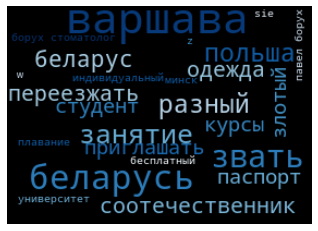

In [367]:
wordcloud = WordCloud(width=280, height=200, max_font_size=40, min_font_size=10,colormap="Blues").generate(text_raw_liked)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

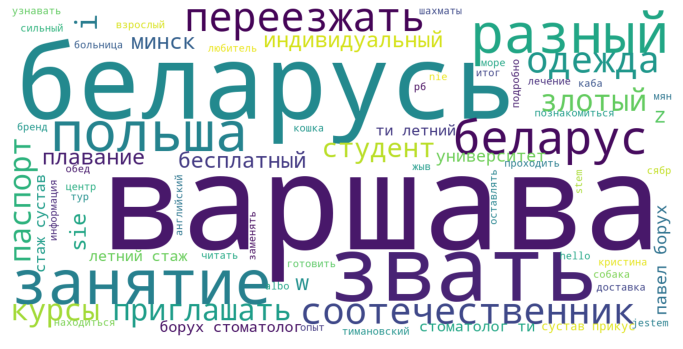

In [368]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=russian_stopwords,
        max_words=70,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw_liked)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw_liked)

In [369]:
df_mostcomment.shape

(40, 9)

In [370]:
comm_text = df_mostcomment['text_lemm']

In [371]:
clean = ' '.join(str (e)for e in comm_text)
text_tokens_comm = word_tokenize(clean)
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]
text_tokens_comm = [token.strip() for token in text_tokens_comm if token not in russian_stopwords]
text_tokens_comm

['кристина',
 'тимановский',
 'желающий',
 'помогать',
 'оформлять',
 'карта',
 'мультиспорт',
 'медиков',
 'спорт',
 'карта',
 'доступ',
 'объект',
 'польша',
 'карта',
 'оформлять',
 'взаимно',
 'выгодный',
 'условие',
 'помогать',
 'карта',
 'помогать',
 'пользоваться',
 'услуга',
 'обладатель',
 'карта',
 'вероятность',
 'доставец',
 'снижать',
 'цена',
 'карта',
 'помогать',
 'детальный',
 'информация',
 'лс',
 'p',
 's',
 'благодаря',
 'контракт',
 'hello',
 'бесплатный',
 'курсы',
 'английский',
 'язык',
 'кембриджский',
 'университет',
 'надежный',
 'студент',
 'пропускать',
 'занятие',
 'онлайн',
 'zoom',
 'камера',
 'микрофон',
 'группа',
 'студент',
 'разный',
 'типичный',
 'курсы',
 'практика',
 'upd',
 'ответ',
 'проверять',
 'запрос',
 'переписка',
 'добавляться',
 'февраль',
 'успевать',
 'карта',
 'мультиспорт',
 'март',
 'март',
 'заявка',
 'апрель',
 'hello',
 'бесплатный',
 'курсы',
 'английский',
 'язык',
 'кембриджский',
 'университет',
 'надежный',
 'студент',
 'п

In [372]:
final_comm = nltk.Text(text_tokens_comm)
text_raw_comm = " ".join(final_comm)

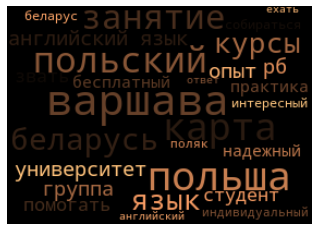

In [373]:
wordcloud = WordCloud(width=280, height=200, max_font_size=40, min_font_size=10,colormap="copper").generate(text_raw_comm)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

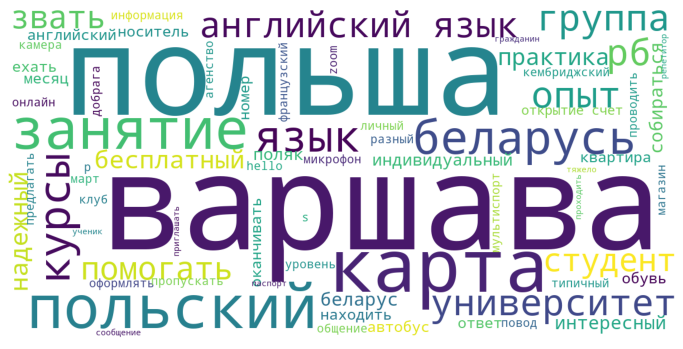

In [374]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=russian_stopwords,
        max_words=70,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw_comm)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw_comm)

In [375]:
df_ukraine.shape

(220, 9)

In [376]:
ukr_text = df_ukraine['text_lemm']

In [396]:
#count number of words
from collections import Counter
results = set()

In [397]:
len(list(set(" ".join(df_ukraine['text_lemm'].values.tolist()).lower().split(" "))))

1422

In [377]:
clean = ' '.join(str (e)for e in ukr_text)
text_tokens_ukr = word_tokenize(clean)
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]
text_tokens_ukr = [token.strip() for token in text_tokens_ukr if token not in russian_stopwords]
text_tokens_ukr

['белорус',
 'гуманитарный',
 'виза',
 'летать',
 'украина',
 'таблетка',
 'новинет',
 'привозить',
 'украина',
 'срок',
 'годность',
 'наличие',
 'упаковка',
 'блистер',
 'мужчина',
 'сборка',
 'корпусной',
 'мебель',
 'опыт',
 'официальный',
 'трудоустройство',
 'рабочий',
 'польский',
 'виза',
 'украина',
 'консульство',
 'записываться',
 'записываться',
 'невозможно',
 'украина',
 'сталкиваться',
 'проблема',
 'link',
 'онлайн',
 'польский',
 'язык',
 'набор',
 'группа',
 'изучение',
 'польский',
 'уровень',
 'вести',
 'украина',
 'головной',
 'боль',
 'проблема',
 'украина',
 '–',
 'отнюдь',
 'соседний',
 'путин',
 'вежливый',
 'человечек',
 'восточный',
 'граница',
 'настоящий',
 'головной',
 'проблема',
 'украина',
 '–',
 'повальный',
 'коррупция',
 'орган',
 'власть',
 'уровень',
 'ьно',
 'этапный',
 'обращаться',
 'белорус',
 'польша',
 'расписываться',
 'украина',
 'желател',
 'центр',
 'беларусский',
 'солидарность',
 'украина',
 'организовывать',
 'встреча',
 'формат',
 'от

In [378]:
final_ukr = nltk.Text(text_tokens_ukr)
text_raw_ukr = " ".join(final_ukr)

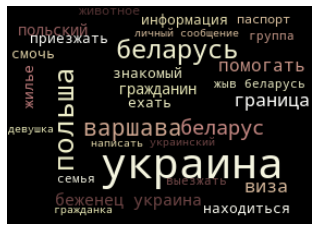

In [379]:
wordcloud = WordCloud(width=280, height=200, max_font_size=40, min_font_size=10,colormap="pink").generate(text_raw_ukr)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

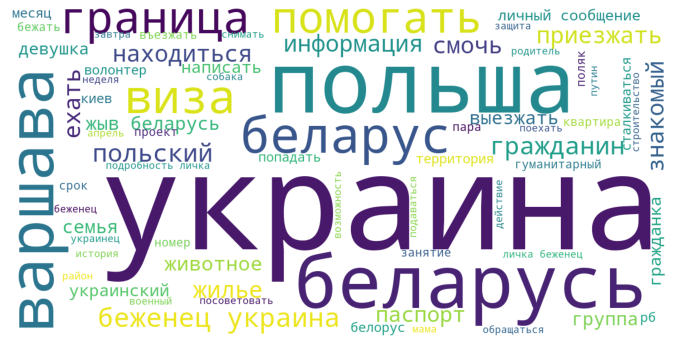

In [380]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=russian_stopwords,
        max_words=70,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw_ukr)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw_ukr)

In [381]:
df_discrimination.shape

(5, 9)

In [382]:
disc_text = df_discrimination['text_lemm']

In [383]:
clean = ' '.join(str (e)for e in disc_text)
text_tokens_disc = word_tokenize(clean)
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]
text_tokens_disc = [token.strip() for token in text_tokens_ukr if token not in russian_stopwords]
text_tokens_disc

['белорус',
 'гуманитарный',
 'виза',
 'летать',
 'украина',
 'таблетка',
 'новинет',
 'привозить',
 'украина',
 'срок',
 'годность',
 'наличие',
 'упаковка',
 'блистер',
 'мужчина',
 'сборка',
 'корпусной',
 'мебель',
 'опыт',
 'официальный',
 'трудоустройство',
 'рабочий',
 'польский',
 'виза',
 'украина',
 'консульство',
 'записываться',
 'записываться',
 'невозможно',
 'украина',
 'сталкиваться',
 'проблема',
 'link',
 'онлайн',
 'польский',
 'язык',
 'набор',
 'группа',
 'изучение',
 'польский',
 'уровень',
 'вести',
 'украина',
 'головной',
 'боль',
 'проблема',
 'украина',
 '–',
 'отнюдь',
 'соседний',
 'путин',
 'вежливый',
 'человечек',
 'восточный',
 'граница',
 'настоящий',
 'головной',
 'проблема',
 'украина',
 '–',
 'повальный',
 'коррупция',
 'орган',
 'власть',
 'уровень',
 'ьно',
 'этапный',
 'обращаться',
 'белорус',
 'польша',
 'расписываться',
 'украина',
 'желател',
 'центр',
 'беларусский',
 'солидарность',
 'украина',
 'организовывать',
 'встреча',
 'формат',
 'от

In [384]:
final_disc = nltk.Text(text_tokens_disc)
text_raw_disc = " ".join(final_disc)

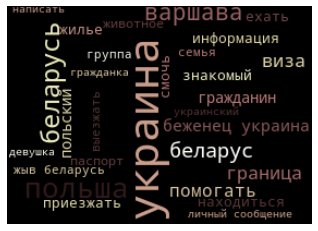

In [385]:
wordcloud = WordCloud(width=280, height=200, max_font_size=40, min_font_size=10,colormap="pink").generate(text_raw_disc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [391]:
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens_ukr)


In [392]:
fdist.most_common(30)

[('украина', 242),
 ('беларусь', 67),
 ('польша', 66),
 ('варшава', 38),
 ('помогать', 37),
 ('беженец', 33),
 ('беларус', 30),
 ('граница', 29),
 ('виза', 25),
 ('гражданин', 23),
 ('польский', 18),
 ('находиться', 16),
 ('приезжать', 15),
 ('ситуация', 14),
 ('смочь', 14),
 ('ехать', 14),
 ('жилье', 14),
 ('отношение', 14),
 ('рб', 13),
 ('информация', 13),
 ('знакомый', 13),
 ('центр', 12),
 ('паспорт', 12),
 ('личка', 11),
 ('животное', 11),
 ('сообщение', 11),
 ('группа', 10),
 ('выезжать', 10),
 ('жыв', 10),
 ('семья', 10)]

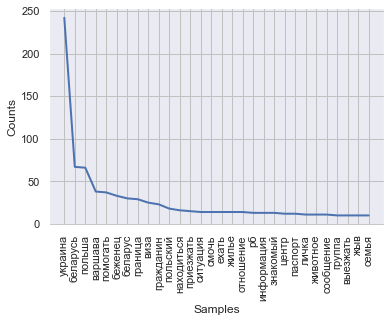

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [393]:
fdist_disc.plot(30,cumulative=False)

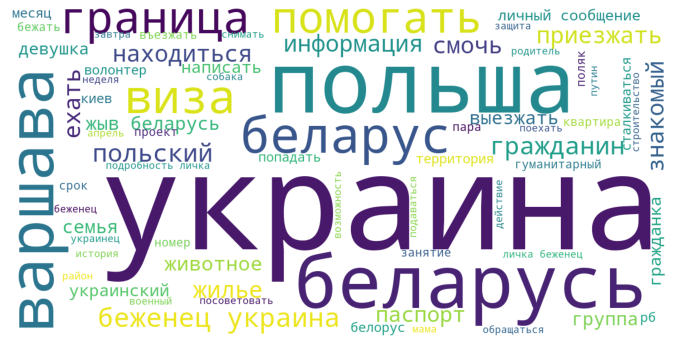

In [389]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=russian_stopwords,
        max_words=70,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw_disc)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw_disc)

In [178]:
df_rezim.shape

(16, 9)

In [179]:
rezim_text = df_rezim['text_lemm']

In [180]:
rezim_text

672     обучение холодный звонок прием обработка заявк...
887     режим бояться смелый гражданин физический возм...
1370    приветствовать ходить автобус варшава аэропорт...
1453    беларусский диаспора рубеж релокант выезжать  ...
1561    автосервис awangard serwis менеджер опыт требо...
1715           обстановка граница беларусь штатный режим 
1780    зараз відбувається народный вийна як буває кіл...
2132    переезжать варшава месяц обустроиться отправля...
2511    гражданин рб находиться польша получаться поли...
2865    власть польша решение отменять масочный режим ...
2869    отмена масочный режим мартаия март министр здр...
4169    беларус польша забирать социальный выплата сог...
5288    миологический режим польша менять санитарный э...
5987    wniosek часовой побыт тупить заполнять внесечь...
7204    bypol вести подготовка беларус менять режим де...
7675    правовой положение гражданин беларусь отмена р...
Name: text_lemm, dtype: object

In [181]:
clean = ' '.join(str (e)for e in rezim_text)
text_tokens_rezim = word_tokenize(clean)
with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]
text_tokens_rezim = [token.strip() for token in text_tokens_rezim if token not in russian_stopwords]
text_tokens_rezim

['обучение',
 'холодный',
 'звонок',
 'прием',
 'обработка',
 'заявка',
 'удаленный',
 'режим',
 'кандидат',
 'высокий',
 'высокий',
 'личный',
 'культура',
 'грамотный',
 'речь',
 'письмо',
 'опыт',
 'клиент',
 'приветствоваться',
 'кандидат',
 'multitask',
 'стресс',
 'ситуация',
 'вести',
 'телефон',
 'рекомендация',
 'лор',
 'врач',
 'взрослый',
 'русскоговорящег',
 'режим',
 'бояться',
 'смелый',
 'гражданин',
 'физический',
 'возможность',
 'запугивать',
 'наказывать',
 'лукашенко',
 'открывать',
 'участок',
 'посольство',
 'лишать',
 'сотня',
 'беларус',
 'приветствовать',
 'ходить',
 'автобус',
 'варшава',
 'аэропорт',
 'гродно',
 'беласток',
 'гродно',
 'обычный',
 'режим',
 'граница',
 'кузница',
 'открытый',
 'автобус',
 'ехать',
 'пропускной',
 'пункт',
 'типо',
 'бобровник',
 'отписываться',
 'благоларь',
 'беларусский',
 'диаспора',
 'рубеж',
 'релокант',
 'выезжать',
 '–',
 'беларусь',
 'беларус',
 'забывать',
 'преступление',
 'режим',
 'режим',
 'перевертывать',
 'стра

In [182]:
final_rezim = nltk.Text(text_tokens_rezim)
text_raw_rezim = " ".join(final_rezim)

In [185]:
from nltk.probability import FreqDist
fdist_rez = FreqDist(text_tokens_rezim)
fdist_rez

FreqDist({'режим': 17, '·': 8, 'забирать': 5, 'опыт': 4, 'беларус': 4, 'польша': 4, 'кандидат': 3, 'клиент': 3, 'ситуация': 3, 'гражданин': 3, ...})

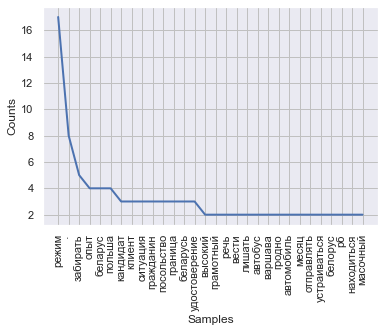

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [186]:
fdist_rez.plot(30,cumulative=False)

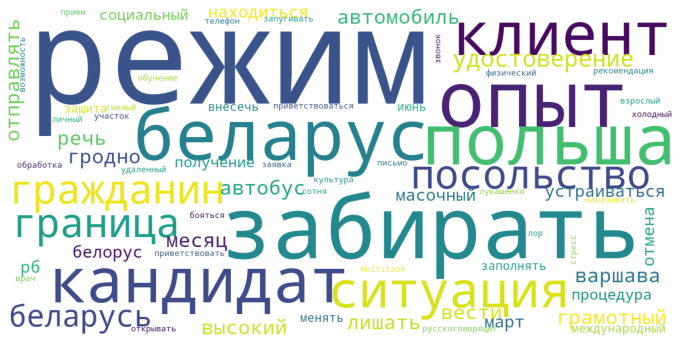

In [187]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        max_words=70,
        max_font_size=80,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(text_raw_rezim)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(text_raw_disc)

In [188]:
df_mostcomment

date  likes  comments  \
2850  2022-03-23    606      2020   
1090  2022-02-10     34      1930   
740   2022-01-26    280      1860   
1070  2022-02-10     34      1860   
739   2022-01-26    277      1820   
6775  2022-06-25     82      1420   
872   2022-02-05    122      1010   
2691  2022-03-20    229       800   
5784  2022-05-23     73       730   
2655  2022-03-19     23       690   
730   2022-01-24    276       670   
772   2022-02-02     75       670   
6750  2022-06-24    148       660   
2572  2022-03-18     36       620   
850   2022-02-04    120       610   
738   2022-01-26     78       600   
6304  2022-06-12    216       600   
7846  2022-07-18     20       590   
61    2022-01-07     25       550   
3242  2022-03-31    854       540   
918   2022-02-06     78       520   
1756  2022-02-28     36       510   
2970  2022-03-25    115       510   
485   2022-01-16     32       490   
3554  2022-04-06    317       490   
14    2022-01-04      1       480   
3613  2022-04-07     20       480   
3680  2022-04-08     20       470   
734   2022-01-25    567       460   
2211  2022-03-05     19       460   
5713  2022-05-22     61       460   
7786  2022-07-17    179       460   
1633  2022-02-26     28       450   
5758  2022-05-23    121       450   
1154  2022-02-12    365       430   
1892  2022-02-28     54       430   
3282  2022-04-01     43       430   
3285  2022-04-01     79       430   
393   2022-01-14     24       420   
2255  2022-03-13     13       420   

                                           link to post  \
2850  https://mbasic.facebook.com/groups/32275791783...   
1090  https://mbasic.facebook.com/groups/32275791783...   
740   https://mbasic.facebook.com/groups/32275791783...   
1070  https://mbasic.facebook.com/groups/32275791783...   
739   https://mbasic.facebook.com/groups/32275791783...   
6775  https://mbasic.facebook.com/groups/32275791783...   
872   https://mbasic.facebook.com/groups/32275791783...   
2691  https://mbasic.facebook.com/groups/32275791783...   
5784  https://mbasic.facebook.com/groups/32275791783...   
2655  https://mbasic.facebook.com/groups/32275791783...   
730   https://mbasic.facebook.com/groups/32275791783...   
772   https://mbasic.facebook.com/groups/32275791783...   
6750  https://mbasic.facebook.com/groups/32275791783...   
2572  https://mbasic.facebook.com/groups/32275791783...   
850   https://mbasic.facebook.com/groups/32275791783...   
738   https://mbasic.facebook.com/groups/32275791783...   
6304  https://mbasic.facebook.com/groups/32275791783...   
7846  https://mbasic.facebook.com/groups/32275791783...   
61    https://mbasic.facebook.com/groups/32275791783...   
3242  https://mbasic.facebook.com/groups/32275791783...   
918   https://mbasic.facebook.com/groups/32275791783...   
1756  https://mbasic.facebook.com/groups/32275791783...   
2970  https://mbasic.facebook.com/groups/32275791783...   
485   https://mbasic.facebook.com/groups/32275791783...   
3554  https://mbasic.facebook.com/groups/32275791783...   
14    https://mbasic.facebook.com/groups/32275791783...   
3613  https://mbasic.facebook.com/groups/32275791783...   
3680  https://mbasic.facebook.com/groups/32275791783...   
734   https://mbasic.facebook.com/groups/32275791783...   
2211  https://mbasic.facebook.com/groups/32275791783...   
5713  https://mbasic.facebook.com/groups/32275791783...   
7786  https://mbasic.facebook.com/groups/32275791783...   
1633  https://mbasic.facebook.com/groups/32275791783...   
5758  https://mbasic.facebook.com/groups/32275791783...   
1154  https://mbasic.facebook.com/groups/32275791783...   
1892  https://mbasic.facebook.com/groups/32275791783...   
3282  https://mbasic.facebook.com/groups/32275791783...   
3285  https://mbasic.facebook.com/groups/32275791783...   
393   https://mbasic.facebook.com/groups/32275791783...   
2255  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
2850        Все

In [189]:
df_mostcomment.to_csv('C:/Users/dell/Desktop/pliki/comm_file.csv', index = False)

In [190]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\comm_file.csv')

In [191]:
df

date  likes  comments  \
0   2022-03-23    606      2020   
1   2022-02-10     34      1930   
2   2022-01-26    280      1860   
3   2022-02-10     34      1860   
4   2022-01-26    277      1820   
5   2022-06-25     82      1420   
6   2022-02-05    122      1010   
7   2022-03-20    229       800   
8   2022-05-23     73       730   
9   2022-03-19     23       690   
10  2022-01-24    276       670   
11  2022-02-02     75       670   
12  2022-06-24    148       660   
13  2022-03-18     36       620   
14  2022-02-04    120       610   
15  2022-01-26     78       600   
16  2022-06-12    216       600   
17  2022-07-18     20       590   
18  2022-01-07     25       550   
19  2022-03-31    854       540   
20  2022-02-06     78       520   
21  2022-02-28     36       510   
22  2022-03-25    115       510   
23  2022-01-16     32       490   
24  2022-04-06    317       490   
25  2022-01-04      1       480   
26  2022-04-07     20       480   
27  2022-04-08     20       470   
28  2022-01-25    567       460   
29  2022-03-05     19       460   
30  2022-05-22     61       460   
31  2022-07-17    179       460   
32  2022-02-26     28       450   
33  2022-05-23    121       450   
34  2022-02-12    365       430   
35  2022-02-28     54       430   
36  2022-04-01     43       430   
37  2022-04-01     79       430   
38  2022-01-14     24       420   
39  2022-03-13     13       420   

                                         link to post  \
0   https://mbasic.facebook.com/groups/32275791783...   
1   https://mbasic.facebook.com/groups/32275791783...   
2   https://mbasic.facebook.com/groups/32275791783...   
3   https://mbasic.facebook.com/groups/32275791783...   
4   https://mbasic.facebook.com/groups/32275791783...   
5   https://mbasic.facebook.com/groups/32275791783...   
6   https://mbasic.facebook.com/groups/32275791783...   
7   https://mbasic.facebook.com/groups/32275791783...   
8   https://mbasic.facebook.com/groups/32275791783...   
9   https://mbasic.facebook.com/groups/32275791783...   
10  https://mbasic.facebook.com/groups/32275791783...   
11  https://mbasic.facebook.com/groups/32275791783...   
12  https://mbasic.facebook.com/groups/32275791783...   
13  https://mbasic.facebook.com/groups/32275791783...   
14  https://mbasic.facebook.com/groups/32275791783...   
15  https://mbasic.facebook.com/groups/32275791783...   
16  https://mbasic.facebook.com/groups/32275791783...   
17  https://mbasic.facebook.com/groups/32275791783...   
18  https://mbasic.facebook.com/groups/32275791783...   
19  https://mbasic.facebook.com/groups/32275791783...   
20  https://mbasic.facebook.com/groups/32275791783...   
21  https://mbasic.facebook.com/groups/32275791783...   
22  https://mbasic.facebook.com/groups/32275791783...   
23  https://mbasic.facebook.com/groups/32275791783...   
24  https://mbasic.facebook.com/groups/32275791783...   
25  https://mbasic.facebook.com/groups/32275791783...   
26  https://mbasic.facebook.com/groups/32275791783...   
27  https://mbasic.facebook.com/groups/32275791783...   
28  https://mbasic.facebook.com/groups/32275791783...   
29  https://mbasic.facebook.com/groups/32275791783...   
30  https://mbasic.facebook.com/groups/32275791783...   
31  https://mbasic.facebook.com/groups/32275791783...   
32  https://mbasic.facebook.com/groups/32275791783...   
33  https://mbasic.facebook.com/groups/32275791783...   
34  https://mbasic.facebook.com/groups/32275791783...   
35  https://mbasic.facebook.com/groups/32275791783...   
36  https://mbasic.facebook.com/groups/32275791783...   
37  https://mbasic.facebook.com/groups/32275791783...   
38  https://mbasic.facebook.com/groups/32275791783...   
39  https://mbasic.facebook.com/groups/32275791783...   

                                               postfs  \
0         Всем привет , на связи Кристина Тимановская   
1   Добрый день! Для всех желающих поможем оформит...   
2   Hello  Бесплатные курсы английского языка от К...   
3   Upd:

In [195]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')

df

date  likes  comments  \
0     2022-01-02      1        70   
1     2022-01-03     13        10   
2     2022-01-03     11       210   
3     2022-01-03     10       210   
4     2022-01-03     14       380   
...          ...    ...       ...   
7978  2022-07-21      1        40   
7979  2022-07-21      0        40   
7980  2022-07-21      1        40   
7981  2022-07-21      0        50   
7982  2022-07-21     38        80   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7978  https://mbasic.facebook.com/groups/32275791783...   
7979  https://mbasic.facebook.com/groups/32275791783...   
7980  https://mbasic.facebook.com/groups/32275791783...   
7981  https://mbasic.facebook.com/groups/32275791783...   
7982  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     Привет! Вопрос о пересечении границы Беларусь-...   
1                   Также делаю квесты для детей для...   
2     Здравствуйте! Планирую открыть счёт в банке PK...   
3     Всем привет. Может у кого-то из вас была такая...   
4     Кто-нибудь в курсе, что за изменения в отношен...   
...                                                 ...   
7978  Подскажите пожалуйста,из Тересполя в Брест,кро...   
7979  Добрый день, кто-нибудь знает, можно ли привит...   
7980  Добрага дня, шаноўныя ! Можа тут нехта працуе ...   
7981  Всем привет Подскажите, где оформить доверенно...   
7982                                        Отдам даром   

                                          preproccessed  \
0     Привет Вопрос о пересечении границы Беларусь П...   
1                     Также делаю квесты для детей для    
2     Здравствуйте Планирую открыть счёт в банке PKO...   
3     Всем привет Может у кого то из вас была такая ...   
4     Кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  Подскажите пожалуйста из Тересполя в Брест кро...   
7979  Добрый день кто нибудь знает можно ли привить ...   
7980  Добрага дня шаноўныя Можа тут нехта працуе ў т...   
7981  Всем привет Подскажите где оформить довереннос...   
7982                                        Отдам даром   

                                              text_prep  \
0     привет вопрос о пересечении границы беларусь п...   
1                     также делаю квесты для детей для    
2     здравствуйте планирую открыть счёт в банке pko...   
3     всем привет может у кого то из вас была такая ...   
4     кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  подскажите пожалуйста из тересполя в брест кро...   
7979  добрый день кто нибудь знает можно ли привить ...   
7980  добрага дня шаноўныя можа тут нехта працуе ў т...   
7981  всем привет подскажите где оформить довереннос...   
7982                                        отдам даром   

                                                text_sw  \
0                   пересечении границы беларусь польша   
1                                          квесты детей   
2     планирую открыть счёт банке pko начисления зп ...   
3     ситуация рб числюсь тунеядец предоставить подт...   
4                   курсе отношении выдачи карты поляка   
...                                                 ...   
7978  подскажите тересполя брест автобуса ездят каки...   
7979  привить covid желательно pfizer ’ ом родителей...   
7980  добрага дня шаноўныя нехта працуе турыстычных ...   
7981  подскажите оформить доверенность машину поеду ...   
7982                                              отдам   

                      

In [196]:
#lemm_str = df['text_lemm'].to_string(index = False)

In [198]:
#df['text_lemm']  = df['text_lemm'].str.replace('\\n','', regex=True)

In [199]:
#df['text_lemm']  = df['text_lemm'].str.replace('\n','', regex=True)

In [201]:
df['text_lemm']

0                    пересечение граница беларусь польша 
1                                                 квеста 
2       планировать открывать счет банк pko начисление...
3       ситуация рб числиться тунеядец предоставлять п...
4                           отношение выдача карта поляк 
                              ...                        
7978    тересполь брест автобус ездить маршрутка приез...
7979    прививать covid желательно pfizer  ’  ом родит...
7980    добрага шаноўныя нехт працуй турыстычный агенц...
7981    оформлять доверенность поехать польша рб знако...
7982                                            отдавать 
Name: text_lemm, Length: 7983, dtype: object

In [202]:
nlp = spacy.load("ru_core_news_sm")

doc=nlp(lemm_str)

[(x.text,x.label_) for x in doc.ents]


from spacy import displacy

displacy.render(doc, style='ent')

In [203]:
[(x.text,x.label_) for x in doc.ents]

[('pko', 'ORG'),
 ('pko', 'ORG'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('цяб', 'ORG'),
 ('тв', 'ORG'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('минск', 'LOC'),
 ('варшава', 'LOC'),
 ('минск', 'LOC'),
 ('быкі іхні', 'PER'),
 ('минск', 'LOC'),
 ('екатерина', 'PER'),
 ('ўсё', 'ORG'),
 ('норвегия', 'LOC'),
 ('yara', 'ORG'),
 ('польша', 'LOC'),
 ('брест', 'LOC'),
 ('варшава', 'LOC'),
 ('польша', 'LOC'),
 ('польша', 'LOC'),
 ('европа', 'LOC'),
 ('польша', 'LOC'),
 ('варшава', 'LOC'),
 ('минск', 'LOC'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('johnson', 'ORG'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC'),
 ('ёсць свежыя', 'PER'),
 ('мо', 'LOC'),
 ('якия', 'LOC'),
 ('польша', 'LOC'),
 ('польша', 'LOC'),
 ('варшава', 'LOC'),
 ('польша', 'LOC'),
 ('круз хадзіў', 'PER'),
 ('польша', 'LOC'),
 ('польша', 'LOC'),
 ('сб', 'ORG'),
 ('минск', 'LOC'),
 ('варшава', 'LOC'),
 ('минск', 'LOC'),
 ('варшава', 'LOC'),
 ('варшава', 'LOC')

In [204]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')

df

date  likes  comments  \
0     2022-01-02      1        70   
1     2022-01-03     13        10   
2     2022-01-03     11       210   
3     2022-01-03     10       210   
4     2022-01-03     14       380   
...          ...    ...       ...   
7978  2022-07-21      1        40   
7979  2022-07-21      0        40   
7980  2022-07-21      1        40   
7981  2022-07-21      0        50   
7982  2022-07-21     38        80   

                                           link to post  \
0     https://mbasic.facebook.com/groups/32275791783...   
1     https://mbasic.facebook.com/groups/32275791783...   
2     https://mbasic.facebook.com/groups/32275791783...   
3     https://mbasic.facebook.com/groups/32275791783...   
4     https://mbasic.facebook.com/groups/32275791783...   
...                                                 ...   
7978  https://mbasic.facebook.com/groups/32275791783...   
7979  https://mbasic.facebook.com/groups/32275791783...   
7980  https://mbasic.facebook.com/groups/32275791783...   
7981  https://mbasic.facebook.com/groups/32275791783...   
7982  https://mbasic.facebook.com/groups/32275791783...   

                                                 postfs  \
0     Привет! Вопрос о пересечении границы Беларусь-...   
1                   Также делаю квесты для детей для...   
2     Здравствуйте! Планирую открыть счёт в банке PK...   
3     Всем привет. Может у кого-то из вас была такая...   
4     Кто-нибудь в курсе, что за изменения в отношен...   
...                                                 ...   
7978  Подскажите пожалуйста,из Тересполя в Брест,кро...   
7979  Добрый день, кто-нибудь знает, можно ли привит...   
7980  Добрага дня, шаноўныя ! Можа тут нехта працуе ...   
7981  Всем привет Подскажите, где оформить доверенно...   
7982                                        Отдам даром   

                                          preproccessed  \
0     Привет Вопрос о пересечении границы Беларусь П...   
1                     Также делаю квесты для детей для    
2     Здравствуйте Планирую открыть счёт в банке PKO...   
3     Всем привет Может у кого то из вас была такая ...   
4     Кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  Подскажите пожалуйста из Тересполя в Брест кро...   
7979  Добрый день кто нибудь знает можно ли привить ...   
7980  Добрага дня шаноўныя Можа тут нехта працуе ў т...   
7981  Всем привет Подскажите где оформить довереннос...   
7982                                        Отдам даром   

                                              text_prep  \
0     привет вопрос о пересечении границы беларусь п...   
1                     также делаю квесты для детей для    
2     здравствуйте планирую открыть счёт в банке pko...   
3     всем привет может у кого то из вас была такая ...   
4     кто нибудь в курсе что за изменения в отношени...   
...                                                 ...   
7978  подскажите пожалуйста из тересполя в брест кро...   
7979  добрый день кто нибудь знает можно ли привить ...   
7980  добрага дня шаноўныя можа тут нехта працуе ў т...   
7981  всем привет подскажите где оформить довереннос...   
7982                                        отдам даром   

                                                text_sw  \
0                   пересечении границы беларусь польша   
1                                          квесты детей   
2     планирую открыть счёт банке pko начисления зп ...   
3     ситуация рб числюсь тунеядец предоставить подт...   
4                   курсе отношении выдачи карты поляка   
...                                                 ...   
7978  подскажите тересполя брест автобуса ездят каки...   
7979  привить covid желательно pfizer ’ ом родителей...   
7980  добрага дня шаноўныя нехта працуе турыстычных ...   
7981  подскажите оформить доверенность машину поеду ...   
7982                                              отдам   

                      

In [207]:
import spacy
from collections import  Counter
import seaborn as sns

#work only in "en_core_web_sm"("ru_core_news_sm")

def plot_most_common_named_entity_barchart(text, entity="LOC"):
    nlp = spacy.load("ru_core_news_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    plt.figure(figsize=(15,8))  
    sns.barplot(y,x).set_title(entity)

In [208]:
nlp = spacy.load("ru_core_news_sm")

doc=nlp(lemm_str)

[(x.text,x.label_) for x in doc.ents]


from spacy import displacy

displacy.render(doc, style='ent')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7983 non-null   object
 1   likes          7983 non-null   int64 
 2   comments       7983 non-null   int64 
 3   link to post   7983 non-null   object
 4   postfs         7983 non-null   object
 5   preproccessed  7983 non-null   object
 6   text_prep      7983 non-null   object
 7   text_sw        7983 non-null   object
 8   text_lemm      7983 non-null   object
dtypes: int64(2), object(7)
memory usage: 561.4+ KB


C:\Users\dell\.anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


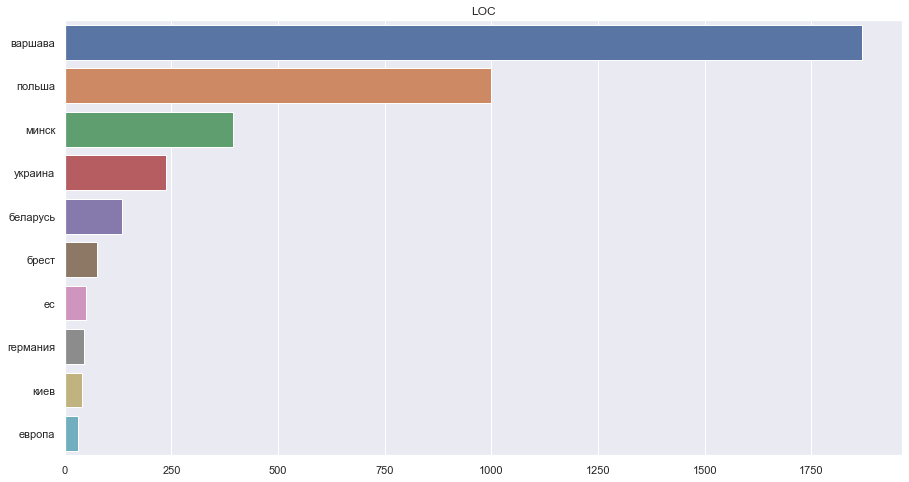

In [211]:
plot_most_common_named_entity_barchart(df['text_lemm'],entity="LOC")  